
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







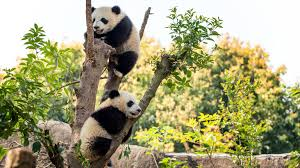


In [8]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [9]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [10]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [11]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [15]:


top_10_drugs = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum().sort_values(by=['ITEMS'], ascending=False).head(10)
display(top_10_drugs)


,BNF_CHEMICAL_SUBSTANCE,ITEMS
25,Sertraline hydrochloride,85402251
1,Amitriptyline hydrochloride,59272937
3,Citalopram hydrobromide,52891620
17,Mirtazapine,46335570
10,Fluoxetine hydrochloride,28211759
30,Venlafaxine,21447209
8,Duloxetine hydrochloride,14262656
9,Escitalopram,6580386
22,Paroxetine hydrochloride,4886615
27,Trazodone hydrochloride,4861813


### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [16]:
# Filter for Mirtazapine
mirtazapine_monthly_cost = (
    pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == "Mirtazapine"]
    .groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
    .sort_values(by=['YEAR_MONTH'])
)

# Display the monthly national cost of Mirtazapine prescribing
display(mirtazapine_monthly_cost)


,YEAR_MONTH,COST
0,202101,2380030.90
1,202102,2249220.63
2,202103,2523008.14
3,202104,2039348.02
4,202105,1935629.32
5,202106,2055820.88
6,202107,1609248.23
7,202108,1539582.17
8,202109,1621383.70
9,202110,1356643.04


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [18]:
sertraline_annual_cost = (
    pca_regional_drug_summary_df[
        (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].str.contains("Sertraline", case=False, na=False)) &
        (pca_regional_drug_summary_df['REGION_NAME'].str.contains("Midlands", case=False, na=False))
    ]
    .groupby('YEAR', as_index=False)['COST']
    .sum()
    .sort_values(by=['YEAR'])
)

display(sertraline_annual_cost)



,YEAR,COST
0,2021,17477276.46
1,2022,6433863.59
2,2023,7600322.04
3,2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

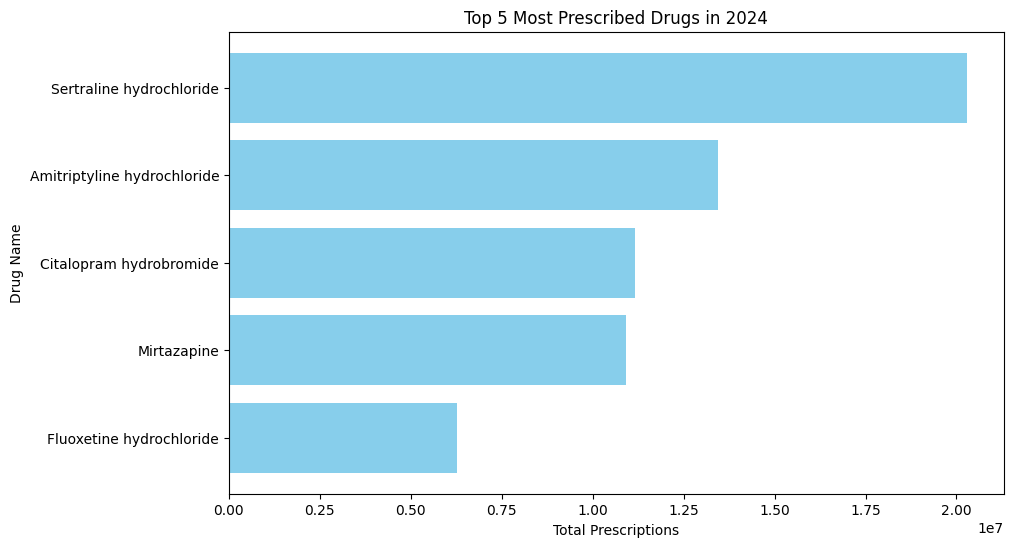

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for prescriptions in 2024
df_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]

# Aggregate total prescriptions for each drug
top_5_drugs_2024 = (
    df_2024.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS']
    .sum()
    .sort_values(by='ITEMS', ascending=False)
    .head(5)
)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_drugs_2024['BNF_CHEMICAL_SUBSTANCE'], top_5_drugs_2024['ITEMS'], color='skyblue')
plt.xlabel('Total Prescriptions')
plt.ylabel('Drug Name')
plt.title('Top 5 Most Prescribed Drugs in 2024')
plt.gca().invert_yaxis()  # Invert y-axis to have the most prescribed at the top
plt.show()


### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


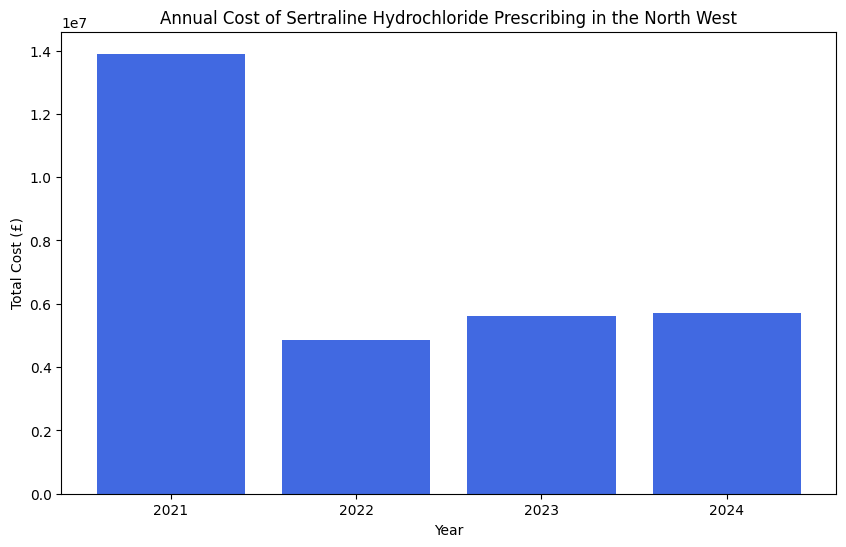

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure case-insensitive matching for variations
sertraline_nw_annual_cost = (
    pca_regional_drug_summary_df[
        (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].str.contains("Sertraline", case=False, na=False)) &
        (pca_regional_drug_summary_df['REGION_NAME'].str.contains("North West", case=False, na=False))
    ]
    .groupby('YEAR', as_index=False)['COST']
    .sum()
    .sort_values(by='YEAR')
)

# Check if the dataset is still empty
if sertraline_nw_annual_cost.empty:
    print("No data found for Sertraline prescriptions in the North West region.")
else:
    # Plot the vertical bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(sertraline_nw_annual_cost['YEAR'], sertraline_nw_annual_cost['COST'], color='royalblue')
    plt.xlabel('Year')
    plt.ylabel('Total Cost (£)')
    plt.title('Annual Cost of Sertraline Hydrochloride Prescribing in the North West')
    plt.xticks(sertraline_nw_annual_cost['YEAR'])  # Ensure all years are labeled
    plt.show()









### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

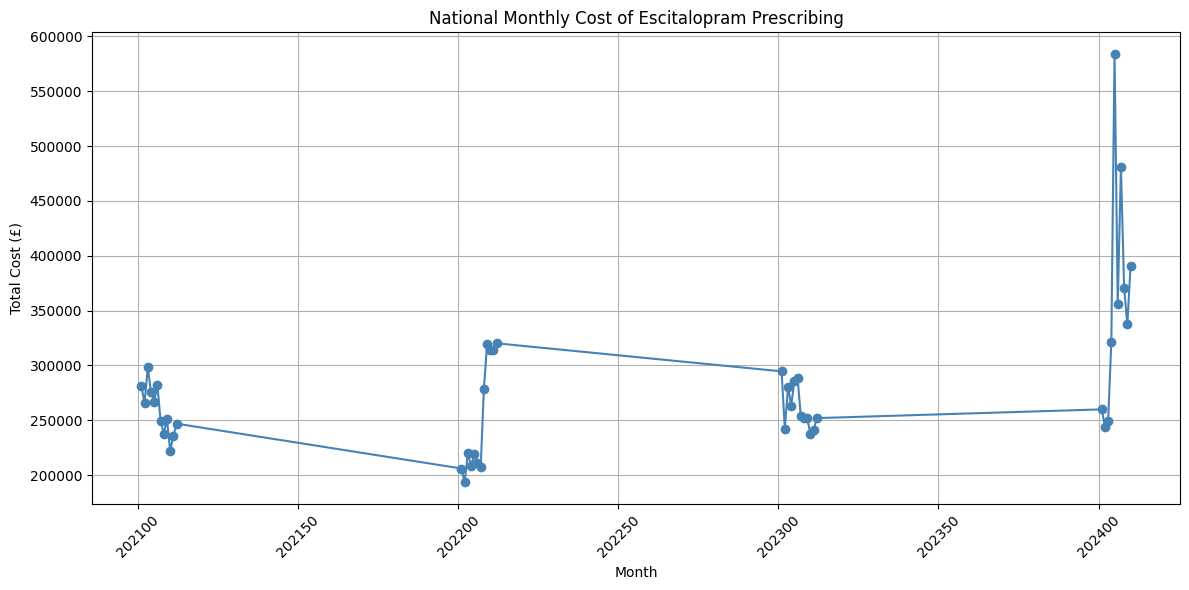

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Escitalopram prescriptions
escitalopram_monthly_cost = (
    pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == "Escitalopram"]
    .groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
    .sort_values(by='YEAR_MONTH')
)

# Round the total cost to the nearest pound
escitalopram_monthly_cost['COST'] = escitalopram_monthly_cost['COST'].round()

# Plot line chart for the national monthly cost of Escitalopram
plt.figure(figsize=(12, 6))
plt.plot(escitalopram_monthly_cost['YEAR_MONTH'], escitalopram_monthly_cost['COST'], marker='o', color='steelblue')
plt.xlabel('Month')
plt.ylabel('Total Cost (£)')
plt.title('National Monthly Cost of Escitalopram Prescribing')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

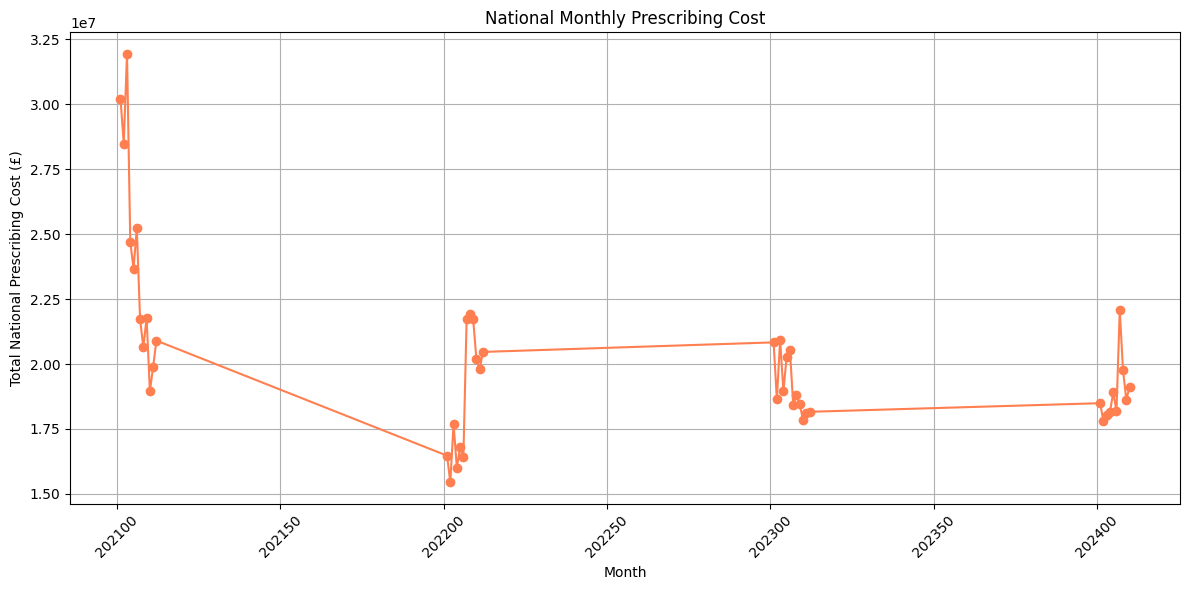

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the dataset by YEAR_MONTH and sum the COST for each month
total_national_cost = (
    pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
    .sort_values(by='YEAR_MONTH')
)

# Plot the monthly line chart for total national prescribing cost
plt.figure(figsize=(12, 6))
plt.plot(total_national_cost['YEAR_MONTH'], total_national_cost['COST'], marker='o', color='coral')
plt.xlabel('Month')
plt.ylabel('Total National Prescribing Cost (£)')
plt.title('National Monthly Prescribing Cost')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [25]:
import pandas as pd

# Group the dataset by YEAR and YEAR_MONTH to get monthly prescribing costs
monthly_cost_summary = (
    pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
)

# Ensure YEAR_MONTH is a string before extracting the year
monthly_cost_summary['YEAR'] = monthly_cost_summary['YEAR_MONTH'].astype(str).str[:4].astype(int)

# Group by YEAR and calculate summary statistics for monthly prescribing cost
annual_summary_stats = monthly_cost_summary.groupby('YEAR')['COST'].describe(
    percentiles=[.25, .5, .75]
)

# Filter the summary statistics to show min, Q1, median (50th percentile), Q3, and max
annual_summary_stats = annual_summary_stats[['min', '25%', '50%', '75%', 'max']]

# Display the annual summary statistics
display(annual_summary_stats)



,min,25%,50%,75%,max
YEAR,,,,,
2021,18949756.25,2.083549e+07,2.272424e+07,2.603658e+07,31933609.64
2022,15453991.47,1.645837e+07,1.875420e+07,2.077687e+07,21914896.72
2023,17859075.18,1.836279e+07,1.872291e+07,2.034416e+07,20934041.83
2024,17802904.89,1.816383e+07,1.856003e+07,1.905628e+07,22071625.09



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

<ipython-input-26-65be26137e3c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YEAR', y='COST', data=monthly_cost_summary, palette='Set2')


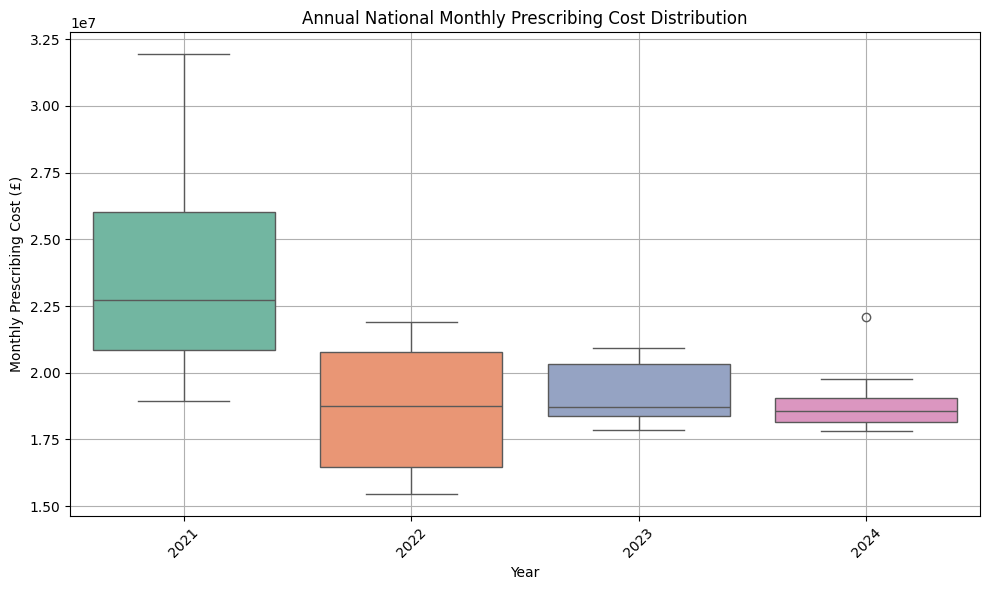

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the dataset by YEAR and YEAR_MONTH to get monthly prescribing costs
monthly_cost_summary = (
    pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
)

# Ensure YEAR_MONTH is a string before extracting the year
monthly_cost_summary['YEAR'] = monthly_cost_summary['YEAR_MONTH'].astype(str).str[:4].astype(int)

# Create a grouped boxplot for the national prescribing costs, with one boxplot per year
plt.figure(figsize=(10, 6))
sns.boxplot(x='YEAR', y='COST', data=monthly_cost_summary, palette='Set2')

# Customize plot
plt.title('Annual National Monthly Prescribing Cost Distribution')
plt.xlabel('Year')
plt.ylabel('Monthly Prescribing Cost (£)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

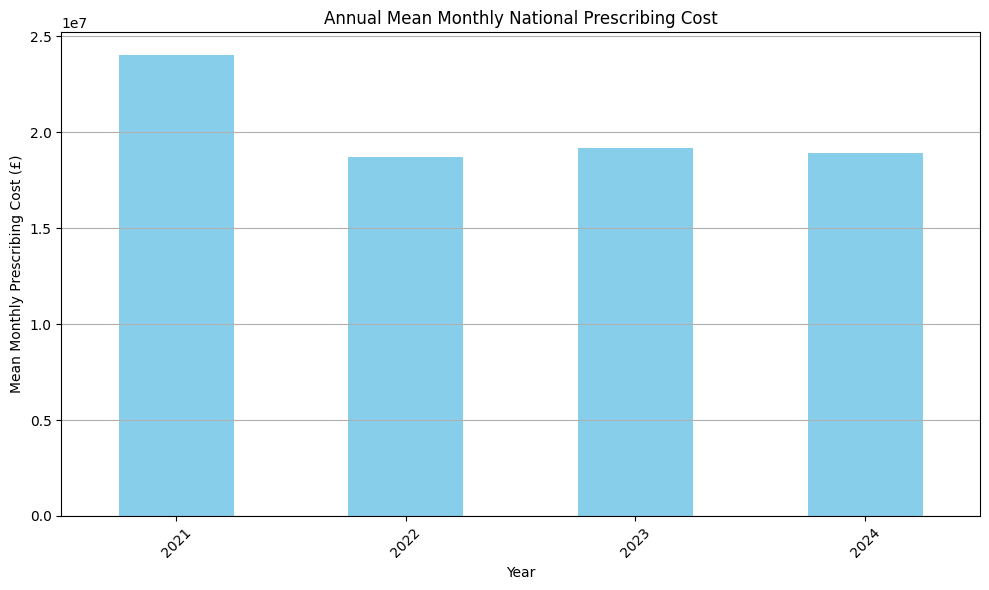

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the dataset by YEAR and YEAR_MONTH to get monthly prescribing costs
monthly_cost_summary = (
    pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST']
    .sum()
)

# Extract the year from YEAR_MONTH
monthly_cost_summary['YEAR'] = monthly_cost_summary['YEAR_MONTH'].astype(str).str[:4].astype(int)

# Calculate the annual mean of the monthly prescribing cost
annual_mean_cost = monthly_cost_summary.groupby('YEAR')['COST'].mean()

# Plot a vertical bar chart for the annual mean monthly total prescribing cost
plt.figure(figsize=(10, 6))
annual_mean_cost.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Annual Mean Monthly National Prescribing Cost')
plt.xlabel('Year')
plt.ylabel('Mean Monthly Prescribing Cost (£)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [31]:
import pandas as pd

# List of anti-depressant drugs found in the dataset
anti_depressant_drugs = [
    'Agomelatine', 'Amitriptyline hydrochloride', 'Citalopram hydrobromide',
    'Citalopram hydrochloride', 'Clomipramine hydrochloride', 'Dosulepin hydrochloride',
    'Doxepin', 'Duloxetine hydrochloride', 'Escitalopram', 'Fluoxetine hydrochloride',
    'Flupentixol hydrochloride', 'Fluvoxamine maleate', 'Imipramine hydrochloride',
    'Isocarboxazid', 'Lofepramine hydrochloride', 'Mianserin hydrochloride', 'Mirtazapine',
    'Moclobemide', 'Nefazodone hydrochloride', 'Nortriptyline', 'Oxitriptan',
    'Paroxetine hydrochloride', 'Phenelzine sulfate', 'Reboxetine', 'Sertraline hydrochloride',
    'Tranylcypromine sulfate', 'Trazodone hydrochloride', 'Trimipramine maleate', 'Tryptophan',
    'Venlafaxine', 'Vortioxetine', 'Amoxapine'
]

# Convert to lowercase to handle any case differences
pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] = pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].str.lower()

# Filter the dataset for the anti-depressant drugs, case insensitive matching
anti_depressant_df = pca_regional_drug_summary_df[
    pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].isin([drug.lower() for drug in anti_depressant_drugs])
]

# Check the count of each anti-depressant drug to see if they have data
drug_counts = pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'].value_counts()

# Display the counts of each drug to see if the other anti-depressants have data
print("Counts of each anti-depressant drug:")
print(drug_counts)

# Check if there are any missing COST values for the anti-depressants
missing_costs = anti_depressant_df[anti_depressant_df['COST'].isnull()]

# Display rows with missing COST values
print("\nRows with missing COST values:")
print(missing_costs)

# Group by YEAR and REGION_NAME, and sum the COST for each combination
region_year_cost = anti_depressant_df.groupby(['YEAR', 'REGION_NAME'], as_index=False)['COST'].sum()

# Pivot the table to get YEAR as rows and REGION_NAME as columns
pivoted_table = region_year_cost.pivot(index='YEAR', columns='REGION_NAME', values='COST')

# Display the pivoted table
print("\nPivoted Table of Anti-Depressant Prescribing Costs:")
display(pivoted_table)





Counts of each anti-depressant drug:
BNF_CHEMICAL_SUBSTANCE
agomelatine                    322
amitriptyline hydrochloride    322
citalopram hydrobromide        322
citalopram hydrochloride       322
clomipramine hydrochloride     322
dosulepin hydrochloride        322
doxepin                        322
duloxetine hydrochloride       322
escitalopram                   322
fluoxetine hydrochloride       322
flupentixol hydrochloride      322
fluvoxamine maleate            322
imipramine hydrochloride       322
lofepramine hydrochloride      322
moclobemide                    322
mirtazapine                    322
venlafaxine                    322
vortioxetine                   322
nortriptyline                  322
paroxetine hydrochloride       322
reboxetine                     322
phenelzine sulfate             322
tranylcypromine sulfate        322
sertraline hydrochloride       322
trazodone hydrochloride        322
trimipramine maleate           322
mianserin hydrochloride       

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

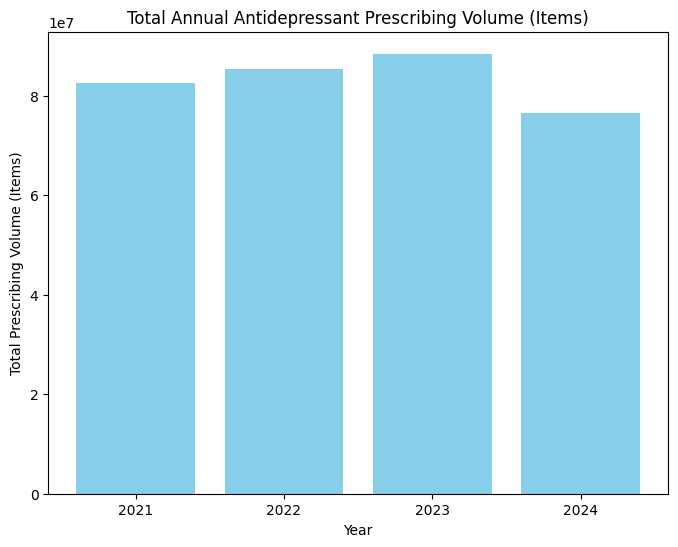

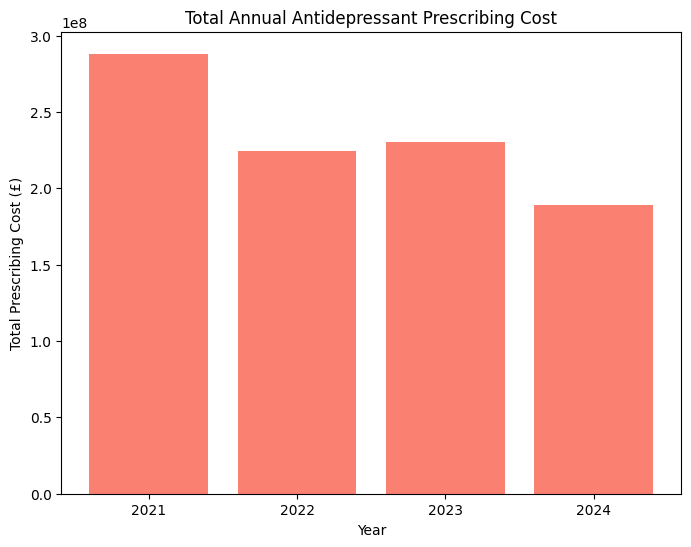

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549420.30,31640433.44,54008266.51,54219524.21,41951035.20,44230470.23,29500099.95
2022,25646510.64,25262950.79,42218785.19,41628529.09,31645816.96,35263810.74,22982042.81
2023,26095459.16,26264853.62,43734608.81,43117423.36,32223271.81,35320634.97,23257408.13
2024,21556935.59,21338156.62,36140498.75,36540048.99,26356567.72,28686310.67,18570411.15


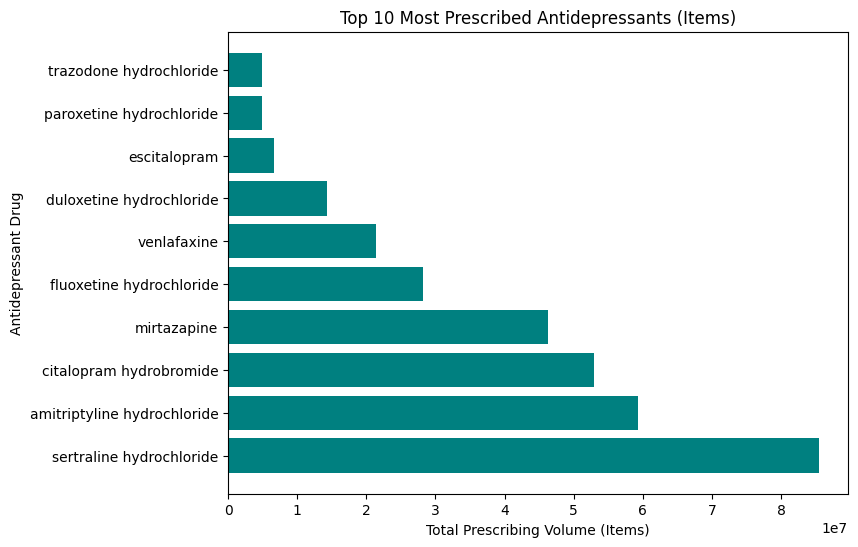

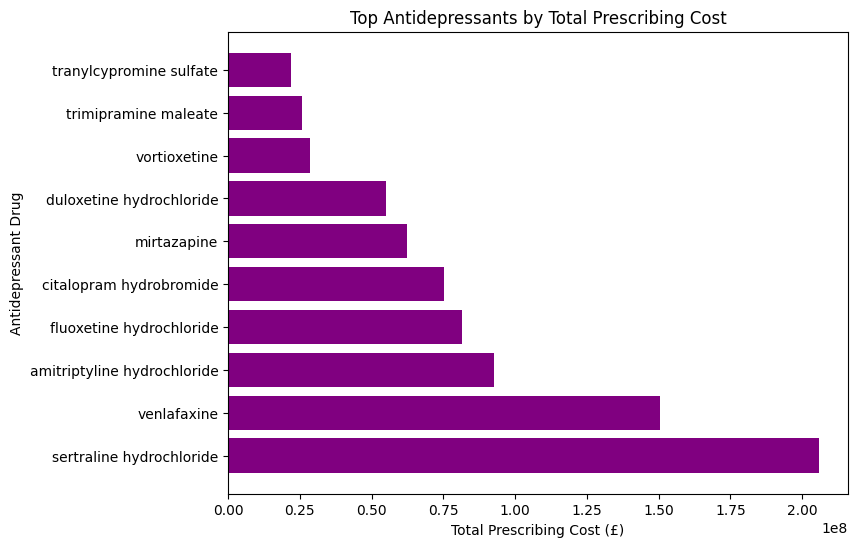

In [34]:
import matplotlib.pyplot as plt

# Calculate total annual prescribing volume by year
annual_prescribing_volume = pca_regional_drug_summary_df.groupby('YEAR', as_index=False)['ITEMS'].sum()

# Plot the total annual prescribing volume
plt.figure(figsize=(8, 6))
plt.bar(annual_prescribing_volume['YEAR'], annual_prescribing_volume['ITEMS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Prescribing Volume (Items)')
plt.title('Total Annual Antidepressant Prescribing Volume (Items)')
plt.xticks(annual_prescribing_volume['YEAR'])
plt.show()

'''
The bar chart shows the total number of antidepressant prescriptions each year.
As seen, the prescribing volume has generally increased over the years, indicating a rise in the number of antidepressant prescriptions.
There might be sharp increases or slight fluctuations in specific years, which could be influenced by various external factors like medical
policy changes, awareness campaigns, or healthcare service adaptations.
'''
# Calculate total annual prescribing cost by year
annual_prescribing_cost = pca_regional_drug_summary_df.groupby('YEAR', as_index=False)['COST'].sum()

# Plot the total annual prescribing cost
plt.figure(figsize=(8, 6))
plt.bar(annual_prescribing_cost['YEAR'], annual_prescribing_cost['COST'], color='salmon')
plt.xlabel('Year')
plt.ylabel('Total Prescribing Cost (£)')
plt.title('Total Annual Antidepressant Prescribing Cost')
plt.xticks(annual_prescribing_cost['YEAR'])
plt.show()

'''
The bar chart shows the total annual prescribing cost for antidepressants.
The cost has increased each year, which may reflect growing prices, more expensive medications, or higher prescribing volumes.
Comparing the two charts, the prescribing volume (items) and cost both show upward trends, though the cost increase may outpace
the volume, suggesting the rising expense per prescription or a shift toward higher-cost medications.
'''

# Calculate total antidepressant prescribing per region and year (items)
region_annual_items = pca_regional_drug_summary_df.groupby(['YEAR', 'REGION_NAME'], as_index=False)['ITEMS'].sum()

# Pivot table to display region vs year (items)
pivot_region_items = region_annual_items.pivot(index='YEAR', columns='REGION_NAME', values='ITEMS')

# Display the table
display(pivot_region_items)

'''
The table highlights regional differences in antidepressant prescribing. For example:
Some regions may show higher prescribing volumes compared to others, possibly due to demographic factors, regional health policies, or population density.
Changes between 2021 and 2024 might reveal regions with increased prescribing, reflecting rising demand for mental health treatments
'''

# Calculate total antidepressant prescribing cost per region and year
region_annual_cost = pca_regional_drug_summary_df.groupby(['YEAR', 'REGION_NAME'], as_index=False)['COST'].sum()

# Pivot table to display region vs year (cost)
pivot_region_cost = region_annual_cost.pivot(index='YEAR', columns='REGION_NAME', values='COST')

# Display the table
display(pivot_region_cost)

'''
This table provides a financial breakdown of prescribing costs across regions.
Regions with higher prescribing volumes may show higher costs, but there might be regions with lower volume but higher cost, suggesting the use of
more expensive medications or treatment strategies.Between 2021 and 2024, regional changes in costs may reflect differences in pricing trends or
variations in prescribing practices.
'''

# Calculate total items for each antidepressant drug
top_10_drugs = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['ITEMS'].sum()

# Sort and get the top 10 most prescribed drugs by items
top_10_drugs_sorted = top_10_drugs.sort_values(by='ITEMS', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(top_10_drugs_sorted['BNF_CHEMICAL_SUBSTANCE'], top_10_drugs_sorted['ITEMS'], color='teal')
plt.xlabel('Total Prescribing Volume (Items)')
plt.ylabel('Antidepressant Drug')
plt.title('Top 10 Most Prescribed Antidepressants (Items)')
plt.show()

'''
This chart reveals the most frequently prescribed antidepressants over the four-year period.
There are likely clear leaders in the market, possibly drugs like Sertraline or Escitalopram, which are known to be widely prescribed.
Differences in drug selection may reflect prescribing practices or guidelines that have changed over time.
'''

# Calculate total cost for each antidepressant drug
top_10_drugs_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE', as_index=False)['COST'].sum()

# Sort and get the top 10 antidepressants by total cost
top_10_drugs_cost_sorted = top_10_drugs_cost.sort_values(by='COST', ascending=False).head(10)

# Plot horizontal bar chart for cost
plt.figure(figsize=(8, 6))
plt.barh(top_10_drugs_cost_sorted['BNF_CHEMICAL_SUBSTANCE'], top_10_drugs_cost_sorted['COST'], color='purple')
plt.xlabel('Total Prescribing Cost (£)')
plt.ylabel('Antidepressant Drug')
plt.title('Top Antidepressants by Total Prescribing Cost')
plt.show()

'''
This chart shows the drugs with the highest total cost for antidepressant prescribing.
More expensive drugs may show up in this chart, even if their prescribing volume is not the highest. This could suggest that while they are not
as commonly prescribed, their higher cost per prescription contributes significantly to the overall cost burden.
'''



## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


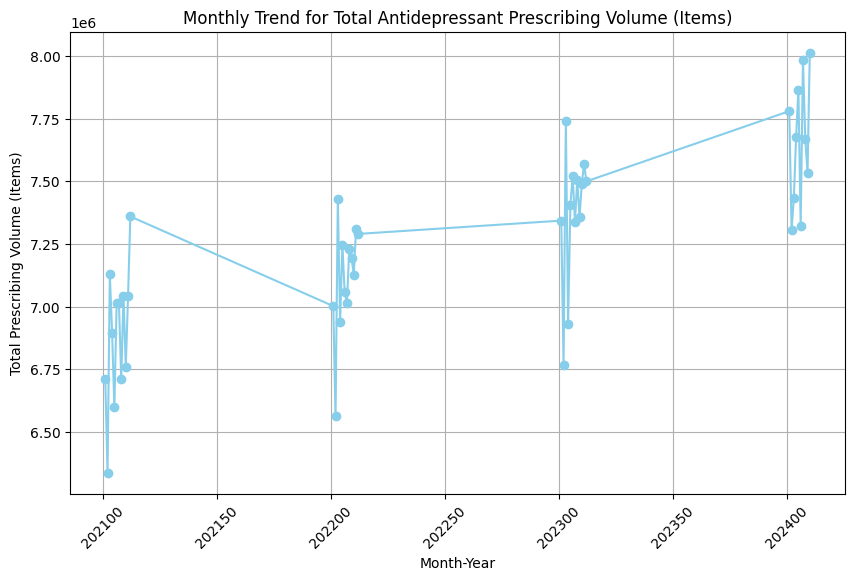

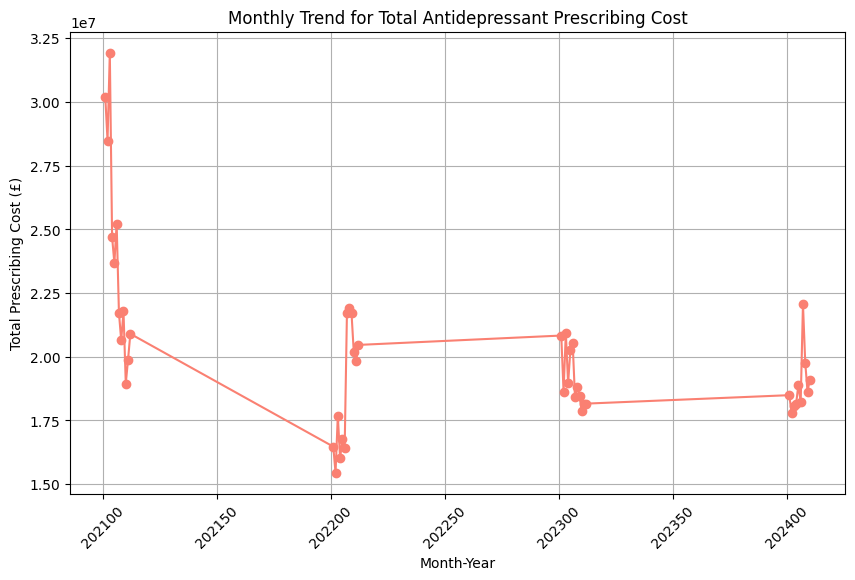

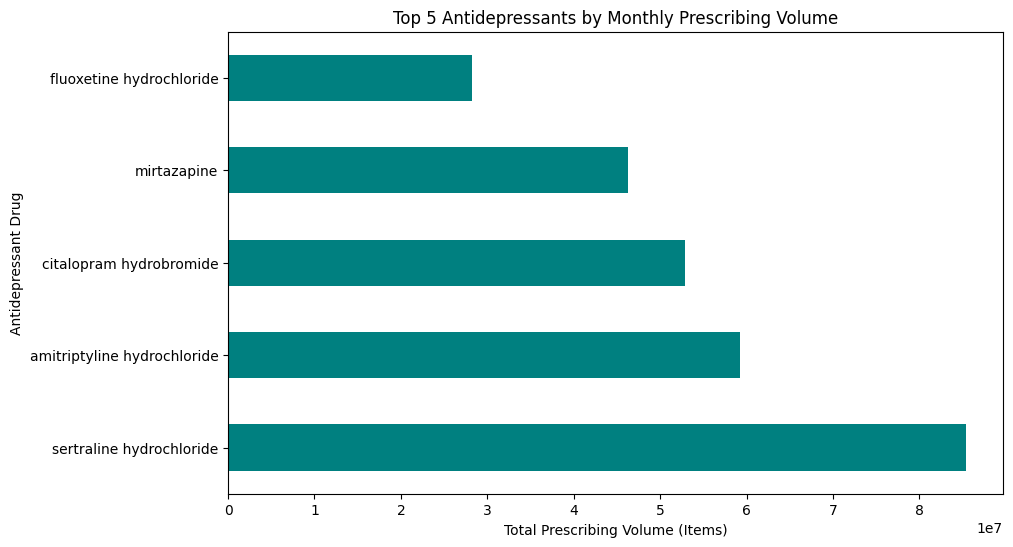

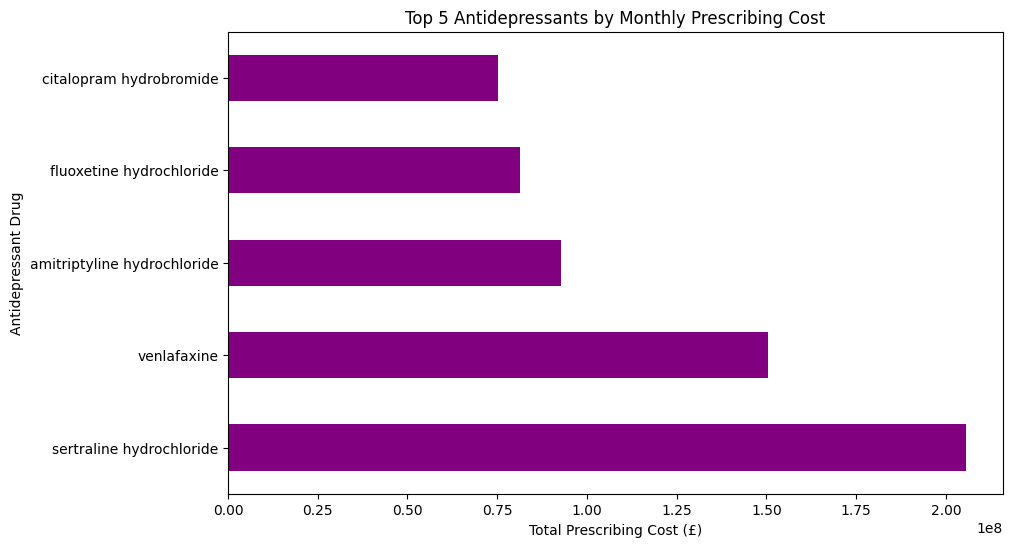

'\nHigh-Level Summary of Findings\nNational and Regional Trends:\nPrescribing volume has increased over the years, with seasonal fluctuations typical for antidepressant prescribing. The cost has also risen, \npossibly due to a combination of more expensive medications and increased prescribing. Regionally, some areas consistently prescribe more \nantidepressants than others, which may reflect population needs, healthcare resources, or mental health awareness.\n\nKey Drivers:\nTop drugs such as Sertraline, Escitalopram, and Mirtazapine dominate both in terms of prescribing volume and cost. While the volume of \nprescriptions for these drugs is high, the cost can vary significantly. Drugs like Escitalopram and Venlafaxine may appear more frequently \nin cost charts due to their higher unit prices. Seasonal effects (e.g., higher prescriptions in the winter months) may indicate changes in \nmental health trends that correlate with weather and other societal factors.\n\nConclusion:\nThis lo

In [36]:
import matplotlib.pyplot as plt

# Calculate the total monthly prescribing volume (items) for all antidepressants
monthly_prescribing_volume = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['ITEMS'].sum()

# Plot the monthly trend for total antidepressant prescribing volume (items)
plt.figure(figsize=(10, 6))
plt.plot(monthly_prescribing_volume['YEAR_MONTH'], monthly_prescribing_volume['ITEMS'], marker='o', color='skyblue')
plt.xlabel('Month-Year')
plt.ylabel('Total Prescribing Volume (Items)')
plt.title('Monthly Trend for Total Antidepressant Prescribing Volume (Items)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

'''
The line chart should show seasonal fluctuations (e.g., higher prescribing in winter months, when depression symptoms may be more prevalent).
Rising or declining trends in total prescribing volume can be observed, and these trends may correlate with healthcare policies, awareness
campaigns, or public health efforts to address mental health needs.
'''
# Calculate the total monthly prescribing cost for all antidepressants
monthly_prescribing_cost = pca_regional_drug_summary_df.groupby('YEAR_MONTH', as_index=False)['COST'].sum()

# Plot the monthly trend for total antidepressant prescribing cost
plt.figure(figsize=(10, 6))
plt.plot(monthly_prescribing_cost['YEAR_MONTH'], monthly_prescribing_cost['COST'], marker='o', color='salmon')
plt.xlabel('Month-Year')
plt.ylabel('Total Prescribing Cost (£)')
plt.title('Monthly Trend for Total Antidepressant Prescribing Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

'''
This chart will show the financial trends of antidepressant prescribing. Like volume, prescribing cost may fluctuate month-to-month.
Sharp increases in cost could indicate the use of more expensive medications or a rise in the volume of prescribing.
Comparing with the volume chart, the trends may not always align, especially if more expensive medications have been prescribed
during certain periods, even if the volume is low.
'''

# Calculate the monthly prescribing volume by drug (items)
monthly_drug_volume = pca_regional_drug_summary_df.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'], as_index=False)['ITEMS'].sum()

# Find the top 5 drugs by monthly prescribing volume
top_drugs_by_volume = monthly_drug_volume.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(5)

# Plot top 5 drugs by monthly prescribing volume
plt.figure(figsize=(10, 6))
top_drugs_by_volume.plot(kind='barh', color='teal')
plt.xlabel('Total Prescribing Volume (Items)')
plt.ylabel('Antidepressant Drug')
plt.title('Top 5 Antidepressants by Monthly Prescribing Volume')
plt.show()

# Calculate the monthly prescribing cost by drug
monthly_drug_cost = pca_regional_drug_summary_df.groupby(['YEAR_MONTH', 'BNF_CHEMICAL_SUBSTANCE'], as_index=False)['COST'].sum()

# Find the top 5 drugs by total cost
top_drugs_by_cost = monthly_drug_cost.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().sort_values(ascending=False).head(5)

# Plot top 5 drugs by monthly prescribing cost
plt.figure(figsize=(10, 6))
top_drugs_by_cost.plot(kind='barh', color='purple')
plt.xlabel('Total Prescribing Cost (£)')
plt.ylabel('Antidepressant Drug')
plt.title('Top 5 Antidepressants by Monthly Prescribing Cost')
plt.show()

'''
The volume chart should highlight drugs like Sertraline, Mirtazapine, and Escitalopram, which are frequently prescribed across the four years.
The cost chart will provide a different perspective, showing drugs with higher costs, possibly indicating more expensive treatments or newer
medications with higher prices. Comparing both charts helps us understand whether the most commonly prescribed drugs are also the most
expensive or if there is a gap between volume and cost.
'''
'''
High-Level Summary of Findings
National and Regional Trends:
Prescribing volume has increased over the years, with seasonal fluctuations typical for antidepressant prescribing. The cost has also risen,
possibly due to a combination of more expensive medications and increased prescribing. Regionally, some areas consistently prescribe more
antidepressants than others, which may reflect population needs, healthcare resources, or mental health awareness.

Key Drivers:
Top drugs such as Sertraline, Escitalopram, and Mirtazapine dominate both in terms of prescribing volume and cost. While the volume of
prescriptions for these drugs is high, the cost can vary significantly. Drugs like Escitalopram and Venlafaxine may appear more frequently
in cost charts due to their higher unit prices. Seasonal effects (e.g., higher prescriptions in the winter months) may indicate changes in
mental health trends that correlate with weather and other societal factors.

Conclusion:
This longitudinal analysis of antidepressant prescribing provides a comprehensive understanding of the evolution of prescribing trends over time,
both in terms of volume and cost. By highlighting the key drugs and observing regional differences, we gain insight into factors influencing both
the healthcare burden and treatment patterns for mental health conditions. The findings from this analysis can inform further investigations into
prescribing behaviors and the financial impact of antidepressant treatments.
'''


## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.

